In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\HP-1\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import os
from keras import preprocessing
from keras.layers import Embedding
imdb_dir = 'C:/Users/HP-1/Downloads/aclImdb/aclImdb'
train_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname),errors='ignore')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)



In [14]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
max_features=15000
maxlen=200
training_samples = 2000  # We will be training on 200 samples
validation_samples = 1000  # We will be validating on 10000 samples
max_words = 15000  # We will only consider the top 10,000 words in the dataset
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 72636 unique tokens.
Shape of data tensor: (17243, 200)
Shape of label tensor: (17243,)


In [4]:
glove_dir='C:/Users/HP-1/Downloads/glove.6B'
embeddings_index={}
f=open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding="utf8")
for line in f:
    values=line.split()
    word=values[0]
    coefs=np.asarray(values[1:],dtype='float32')
    embeddings_index[word]=coefs
f.close()
print('Found %s word vectors.'% len(embeddings_index) )

Found 400000 word vectors.


In [5]:
embedding_dim=100
embedding_matrix=np.zeros((max_words,embedding_dim))
for word,i in word_index.items():
    if i<max_words:
        embedding_vector=embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i]=embedding_vector
            

In [19]:
from keras.models import Sequential
from keras.layers import  Flatten, Dense,Dropout
from keras.layers import SimpleRNN
from keras.layers import Embedding,SimpleRNN
model = Sequential()
model.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 200, 100)          1500000   
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                4256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,504,289
Trainable params: 4,289
Non-trainable params: 1,500,000
_________________________________________________________________


In [20]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.6228 - acc: 0.6844 - val_loss: 0.6233 - val_acc: 0.7200
Epoch 2/10
1600/1600 [==============================] - 2s 1ms/step - loss: 0.5967 - acc: 0.7144 - val_loss: 0.6231 - val_acc: 0.7175
Epoch 3/10
1600/1600 [==============================] - 2s 1ms/step - loss: 0.5880 - acc: 0.7175 - val_loss: 0.6219 - val_acc: 0.7225
Epoch 4/10
1600/1600 [==============================] - 2s 1ms/step - loss: 0.5789 - acc: 0.7231 - val_loss: 0.6257 - val_acc: 0.7075
Epoch 5/10
1600/1600 [==============================] - 2s 1ms/step - loss: 0.5721 - acc: 0.7256 - val_loss: 0.6267 - val_acc: 0.7075
Epoch 6/10
1600/1600 [==============================] - 2s 1ms/step - loss: 0.5667 - acc: 0.7306 - val_loss: 0.6323 - val_acc: 0.6925
Epoch 7/10
1600/1600 [==============================] - 2s 1ms/step - loss: 0.5606 - acc: 0.7244 - val_loss: 0.6319 - val_acc: 0.7125
Epoch 8/10
1600

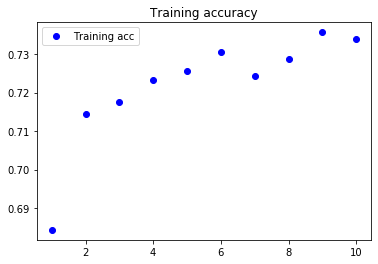

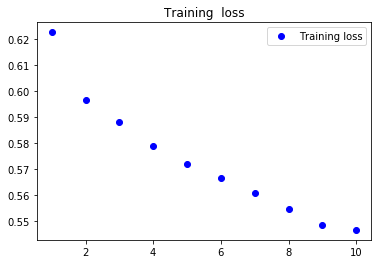

In [22]:
acc=history.history['acc']
loss=history.history['loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.title('Training accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.title('Training  loss')
plt.legend()
plt.show()

In [26]:
model = Sequential()
model.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 200, 100)          1500000   
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 200, 32)           4256      
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, 200, 32)           2080      
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, 200, 32)           2080      
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6401      
Total params: 1,514,817
Trainable params: 14,817
Non-trainable params: 1,500,000
_____________________________________________________________

In [27]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 7s 5ms/step - loss: 0.9098 - acc: 0.6169 - val_loss: 0.6055 - val_acc: 0.7325
Epoch 2/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.5941 - acc: 0.7125 - val_loss: 0.5807 - val_acc: 0.7375
Epoch 3/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.5518 - acc: 0.7306 - val_loss: 0.5792 - val_acc: 0.7150
Epoch 4/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.4892 - acc: 0.7700 - val_loss: 0.6113 - val_acc: 0.7300
Epoch 5/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.4408 - acc: 0.8094 - val_loss: 0.5997 - val_acc: 0.7150
Epoch 6/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.3930 - acc: 0.8494 - val_loss: 0.6160 - val_acc: 0.6875
Epoch 7/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.3535 - acc: 0.8681 - val_loss: 0.6487 - val_acc: 0.6875
Epoch 8/10
1600

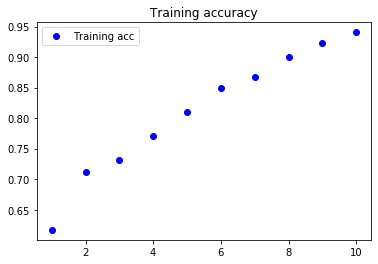

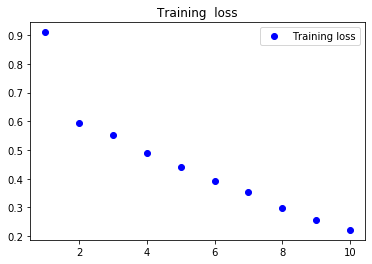

In [28]:
acc=history.history['acc']
loss=history.history['loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.title('Training accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.title('Training  loss')
plt.legend()
plt.show()

In [31]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model.add(LSTM(32,return_sequences=True))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 200, 100)          1500000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 200, 32)           17024     
_________________________________________________________________
flatten_4 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6401      
Total params: 1,523,425
Trainable params: 23,425
Non-trainable params: 1,500,000
_________________________________________________________________


In [33]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(x_train,y_train,epochs=40,batch_size=128,validation_split=0.2)

Train on 1600 samples, validate on 400 samples
Epoch 1/40
1600/1600 [==============================] - 9s 5ms/step - loss: 0.5489 - acc: 0.7294 - val_loss: 0.6056 - val_acc: 0.7300
Epoch 2/40
1600/1600 [==============================] - 5s 3ms/step - loss: 0.4711 - acc: 0.7869 - val_loss: 0.5883 - val_acc: 0.7150
Epoch 3/40
1600/1600 [==============================] - 6s 4ms/step - loss: 0.4576 - acc: 0.7969 - val_loss: 0.6091 - val_acc: 0.6825
Epoch 4/40
1600/1600 [==============================] - 5s 3ms/step - loss: 0.4210 - acc: 0.8237 - val_loss: 0.6862 - val_acc: 0.5925
Epoch 5/40
1600/1600 [==============================] - 5s 3ms/step - loss: 0.4033 - acc: 0.8306 - val_loss: 0.6661 - val_acc: 0.6400
Epoch 6/40
1600/1600 [==============================] - 6s 4ms/step - loss: 0.3742 - acc: 0.8463 - val_loss: 0.6425 - val_acc: 0.6975
Epoch 7/40
1600/1600 [==============================] - 5s 3ms/step - loss: 0.3478 - acc: 0.8606 - val_loss: 0.6740 - val_acc: 0.6450
Epoch 8/40
1600

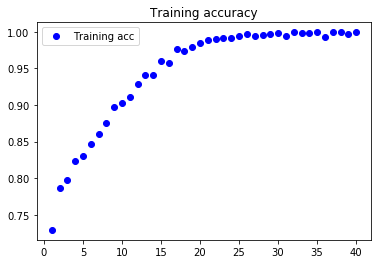

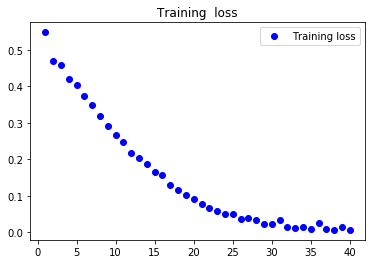

In [34]:
acc=history.history['acc']
loss=history.history['loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.title('Training accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.title('Training  loss')
plt.legend()
plt.show()

In [35]:
model = Sequential()
model.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(32,return_sequences=True))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 200, 100)          1500000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 200, 64)           42240     
_________________________________________________________________
lstm_4 (LSTM)                (None, 200, 32)           12416     
_________________________________________________________________
flatten_5 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6401      
Total params: 1,561,057
Trainable params: 61,057
Non-trainable params: 1,500,000
_________________________________________________________________


In [36]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(x_train,y_train,epochs=40,batch_size=128,validation_split=0.2)

Train on 1600 samples, validate on 400 samples
Epoch 1/40
1600/1600 [==============================] - 18s 11ms/step - loss: 0.6462 - acc: 0.6613 - val_loss: 0.5886 - val_acc: 0.7300
Epoch 2/40
1600/1600 [==============================] - 13s 8ms/step - loss: 0.5951 - acc: 0.7219 - val_loss: 0.6083 - val_acc: 0.7300
Epoch 3/40
1600/1600 [==============================] - 15s 10ms/step - loss: 0.5845 - acc: 0.7231 - val_loss: 0.5913 - val_acc: 0.7300
Epoch 4/40
1600/1600 [==============================] - 14s 9ms/step - loss: 0.5854 - acc: 0.7206 - val_loss: 0.5911 - val_acc: 0.7300
Epoch 5/40
1600/1600 [==============================] - 14s 9ms/step - loss: 0.5620 - acc: 0.7288 - val_loss: 0.6578 - val_acc: 0.7300
Epoch 6/40
1600/1600 [==============================] - 13s 8ms/step - loss: 0.5513 - acc: 0.7381 - val_loss: 0.6196 - val_acc: 0.7325
Epoch 7/40
1600/1600 [==============================] - 12s 7ms/step - loss: 0.5266 - acc: 0.7469 - val_loss: 0.6381 - val_acc: 0.7325
Epoch 

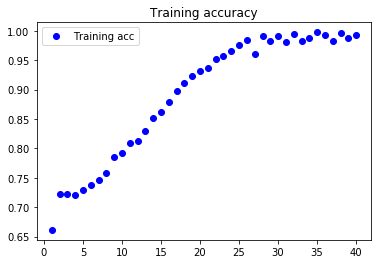

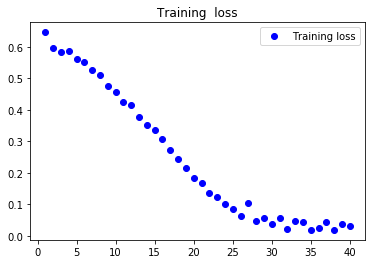

In [37]:
acc=history.history['acc']
loss=history.history['loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.title('Training accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.title('Training  loss')
plt.legend()
plt.show()

In [38]:
model = Sequential()
model.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model.add(LSTM(64,return_sequences=True ,dropout=0.5, recurrent_dropout=0.5))
model.add(LSTM(32,return_sequences=True, dropout=0.5, recurrent_dropout=0.5))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 200, 100)          1500000   
_________________________________________________________________
lstm_5 (LSTM)                (None, 200, 64)           42240     
_________________________________________________________________
lstm_6 (LSTM)                (None, 200, 32)           12416     
_________________________________________________________________
flatten_6 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6401      
Total params: 1,561,057
Trainable params: 61,057
Non-trainable params: 1,500,000
_________________________________________________________________


In [39]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(x_train,y_train,epochs=40,batch_size=128,validation_split=0.2)

Train on 1600 samples, validate on 400 samples
Epoch 1/40
1600/1600 [==============================] - 22s 14ms/step - loss: 0.6402 - acc: 0.6650 - val_loss: 0.6733 - val_acc: 0.7300
Epoch 2/40
1600/1600 [==============================] - 16s 10ms/step - loss: 0.6226 - acc: 0.7013 - val_loss: 0.6199 - val_acc: 0.7300
Epoch 3/40
1600/1600 [==============================] - 16s 10ms/step - loss: 0.6094 - acc: 0.7194 - val_loss: 0.6252 - val_acc: 0.7300
Epoch 4/40
1600/1600 [==============================] - 15s 9ms/step - loss: 0.6117 - acc: 0.7112 - val_loss: 0.6034 - val_acc: 0.7300
Epoch 5/40
1600/1600 [==============================] - 16s 10ms/step - loss: 0.6032 - acc: 0.7200 - val_loss: 0.6126 - val_acc: 0.7300
Epoch 6/40
1600/1600 [==============================] - 16s 10ms/step - loss: 0.6129 - acc: 0.7206 - val_loss: 0.6076 - val_acc: 0.7300
Epoch 7/40
1600/1600 [==============================] - 15s 10ms/step - loss: 0.5978 - acc: 0.7188 - val_loss: 0.5949 - val_acc: 0.7300
Ep

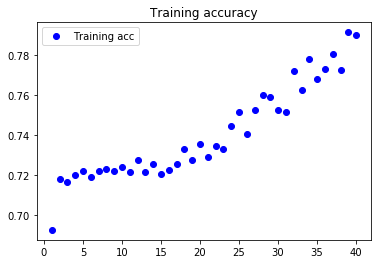

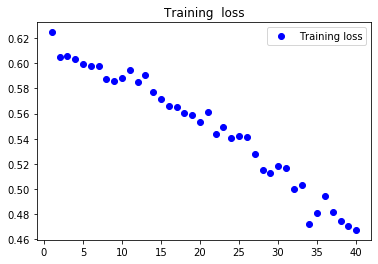

In [44]:
acc=history.history['acc']
loss=history.history['loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.title('Training accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.title('Training  loss')
plt.legend()
plt.show()

In [41]:
model = Sequential()
model.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model.add(LSTM(64,return_sequences=True ,dropout=0.5, recurrent_dropout=0.2))
model.add(LSTM(32,return_sequences=True, dropout=0.5, recurrent_dropout=0.2))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 200, 100)          1500000   
_________________________________________________________________
lstm_9 (LSTM)                (None, 200, 64)           42240     
_________________________________________________________________
lstm_10 (LSTM)               (None, 200, 32)           12416     
_________________________________________________________________
flatten_8 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 6401      
Total params: 1,561,057
Trainable params: 61,057
Non-trainable params: 1,500,000
_________________________________________________________________


In [42]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(x_train,y_train,epochs=40,batch_size=128,validation_split=0.2)

Train on 1600 samples, validate on 400 samples
Epoch 1/40
1600/1600 [==============================] - 23s 15ms/step - loss: 0.6246 - acc: 0.6925 - val_loss: 0.6300 - val_acc: 0.7300
Epoch 2/40
1600/1600 [==============================] - 17s 11ms/step - loss: 0.6051 - acc: 0.7181 - val_loss: 0.5972 - val_acc: 0.7300
Epoch 3/40
1600/1600 [==============================] - 16s 10ms/step - loss: 0.6054 - acc: 0.7162 - val_loss: 0.5978 - val_acc: 0.7300
Epoch 4/40
1600/1600 [==============================] - 16s 10ms/step - loss: 0.6031 - acc: 0.7200 - val_loss: 0.5918 - val_acc: 0.7300
Epoch 5/40
1600/1600 [==============================] - 16s 10ms/step - loss: 0.5995 - acc: 0.7219 - val_loss: 0.5914 - val_acc: 0.7300
Epoch 6/40
1600/1600 [==============================] - 16s 10ms/step - loss: 0.5980 - acc: 0.7188 - val_loss: 0.5888 - val_acc: 0.7300
Epoch 7/40
1600/1600 [==============================] - 16s 10ms/step - loss: 0.5975 - acc: 0.7219 - val_loss: 0.5914 - val_acc: 0.7300
E

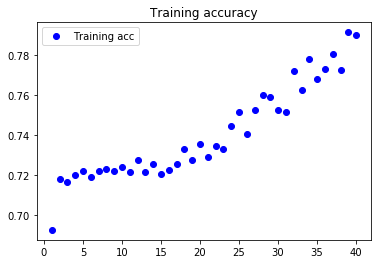

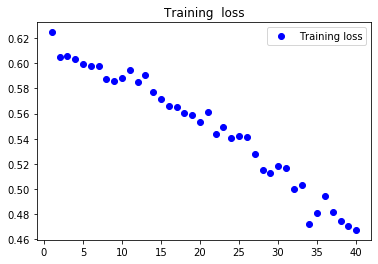

In [43]:
acc=history.history['acc']
loss=history.history['loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.title('Training accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.title('Training  loss')
plt.legend()
plt.show()